1. Скачиваешь датасет из sklearn.datasets.fetch_20newsgroups
2. То же самое что и в прошлый раз (тоже пункт 2 вроде)
3. Опять же, повторение
4. Просто берёшь пару индексов, рандомные или вручную написанные, выводишь всё как из списка
5. Перед обучением модели тебе надо все твои текста перевести в числа, для этого есть CountVectorizer. Просто делаешь .fit_transform(dataset_X) и у тебя уже вектора вместо предложений. Делишь как обычно на train и test
6. Обучаешь как обычно, но модель уже выбираешь одну из этих (какой именно баессовский классификатор делать они не указали, поэтому думаю можно любой) https://scikit-learn.org/stable/modules/naive_bayes.html
7. Всё те же метрики
8. Кривая обучения делается абсолютно точно так же
9. Вывод по таким же признакам

In [1]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

In [ ]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [ ]:
X = news.data
Y = news.target

X = X[:len(X) // 4]
Y = Y[:len(Y) // 4]

In [ ]:
print(X[0])
print(Y[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


10


In [ ]:
print(X[-1])
print(Y[-1])

From: davidr@rincon.ema.rockwell.com (David J. Ray)
Subject: Re: Hallusion info??
Organization: Rockwell International
X-Newsreader: Tin 1.1 PL5
Lines: 11

Sean Murphy (sean@aries.scs.uiuc.edu) wrote:
: Has anyone seen hallusions?  You can buy a poster of them and it looks like a simple dot pattern
: when you first look at it but if you focus behind it you see a 3d picture.  I'm looking for
: a program that generates these pictures.  There's a company in Texas that makes them but I 
: doubt if they're giving the program away.  Any help would be appreciated. 
: 
There is a program included with the book "Virtual Reality Playhouse" which
will let you generate these pictures.  It's not a very powerful program but
it does an acceptable job for experimentation purposes.

davidr@rincon.ema.rockwell.com

1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X = X.todense()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,
         1,  0,  0,  2],
       [ 0, 35,  7,  1,  2,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  0,  0,  0],
       [ 0,  6, 30,  2,  4,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  2,  7, 31,  6,  1,  1,  0,  0,  0,  0,  1,  3,  1,  0,  0,
         0,  0,  0,  0],
       [ 0,  4,  3,  2, 27,  2,  2,  0,  1,  0,  0,  1,  3,  0,  0,  0,
         0,  1,  0,  0],
       [ 0,  8,  2,  0,  0, 41,  0,  0,  0,  1,  0,  0,  2,  1,  0,  0,
         0,  2,  0,  0],
       [ 0,  3,  1,  6,  6,  0, 17,  5,  0,  1,  0,  2,  6,  2,  1,  0,
         2,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  0,  2, 34,  1,  0,  0,  1,  0,  1,  1,  0,
         0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  3, 38,  1,  0,  0,  1,  0,  0,  0,
         1,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0, 40,  2,  0,  0,  1,  0,  0,
         1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0

Text(0.5, 15.0, 'Предсказанные значения')

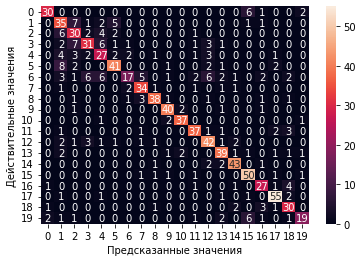

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7444326617179216

In [ ]:
metrics.precision_score(y_test, y_pred, average='macro')

0.751499458851575

In [ ]:
metrics.recall_score(y_test, y_pred, average='macro')

0.7449866147714175